<a href="https://colab.research.google.com/github/juanlucas7/Data_Cleaning_Wrangling/blob/main/Data_Cleaning_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# Isto está formatado como código
```

### **DATA CLEANING E DATA WRANGLING** ✅

In [ ]:
# Importar as bibliotecas
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


  ## **ETAPA 01) - Inspeção dos dados**


In [ ]:
df = pd.read_csv('/content/data 5.csv', encoding='latin-1')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000




## **ETAPA 02) - Verificação de valores faltantes na base**

In [ ]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#Identificando os dados faltantes no dataframe em porcentagem
df_faltantes = (
 df.isna().sum()
 .to_frame('missing_data')
 .join((df.isna().sum() / df.shape[0]).to_frame('missing_pct'))
 .sort_values('missing_data', ascending = False)
)

df_faltantes

,missing_data,missing_pct
CustomerID,135080,0.249267
Description,1454,0.002683
InvoiceNo,0,0.000000
StockCode,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000


In [ ]:
#Removendo os valores nulos

df_clean = df.dropna()

df_clean

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df_clean.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


## **ETAPA 03) - Aplicação de filtro para identificar produtos iguais ou inferiores a zero**

In [ ]:
#Verificando a existência de valores nulos na coluna de preços

null_prices = df_clean['UnitPrice'].isnull().any()

null_prices

False

In [ ]:
#Verificando a existência de valores menor que zero na coluna de preços

mz_prices = (df_clean['UnitPrice'] < 0).any()

mz_prices

False

In [ ]:
#Verificando a existência de valores iguais a zero
zero_prices = (df_clean['UnitPrice'] == 0).any()

zero_prices

True

In [ ]:
#Filtrando o dataset para conter apenas preços acima de zero

df_clean_f = df_clean[df_clean['UnitPrice'] > 0]

df_clean_f

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
#Verificando a existência de valores nulos na coluna de quantidade

null_qnt = df_clean_f['Quantity'].isnull().any()

null_qnt

False

In [ ]:
#Verificando a existência de valores menor que zero na coluna de quantidade

mz_qnt = (df_clean_f['Quantity'] < 0).any()

mz_qnt

True

In [ ]:
#Verificando a existência de valores iguais a zero em quantidade
zero_qnt = (df_clean_f['Quantity'] == 0).any()

zero_qnt

False

In [ ]:
#Filtrando o dataset para conter apenas quantidades acima de zero

df_f = df_clean_f[df_clean['Quantity'] > 0]

df_f

<ipython-input-18-7bebcc2576ba>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_f = df_clean_f[df_clean['Quantity'] > 0]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


## **ETAPA 04) - Verificação de duplicatas**

In [ ]:
#Verificando valores duplicados

df_f.duplicated(keep = False).sum()

10001

In [ ]:
#Removendo as variáveis duplicadas

df_without_duplicates = df_f.drop_duplicates()

df_without_duplicates

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
#Verificação
df_without_duplicates.duplicated(keep = False).sum()

0

In [ ]:
df_without_duplicates.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

## **ETAPA 05) - Verificação dos tipos de dados das colunas**

In [ ]:
#Corrigindo o tipo de dado das colunas "CustomerID" e "InvoiceDate"

df_without_duplicates = df_without_duplicates.astype({"CustomerID":"int64"})


In [ ]:
df_without_duplicates = df_without_duplicates.astype({"InvoiceDate":"datetime64"})

In [ ]:
df_without_duplicates.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

## **ETAPA 06) - Tratando os outliers**

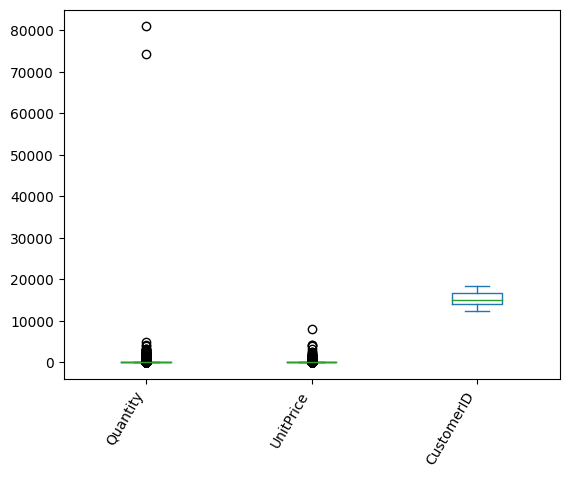

In [ ]:
#Verificando os outliers

df_without_duplicates.plot.box()
plt.xticks(rotation=60, ha='right');

In [ ]:
#Removendo os outliers com o filtro

df_final = df_without_duplicates[(df_without_duplicates['Quantity'] <= 10000) &
                                 (df['UnitPrice'] <= 5000)]

df_final

<ipython-input-31-e73559f4c5f2>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_final = df_without_duplicates[(df_without_duplicates['Quantity'] <= 10000) &


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


## **ETAPA 07) - Criando coluna adicional (Quantidade e Preço Unitário)**

In [ ]:
#Criando uma coluna adicional de valor total de compra
df_final['Total_price'] = df_final['UnitPrice'] * df_final['Quantity']

df_final

<ipython-input-32-d19ec9764c12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Total_price'] = df_final['UnitPrice'] * df_final['Quantity']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


## **ETAPA 08) - Calculando a data da última compra da base**

In [ ]:
#Encontrando a data da última compra

last_buy_date = df_final['InvoiceDate'].max()

last_buy_date

Timestamp('2011-12-09 12:50:00')

## **ETAPA 09) - PLOTAGEM GRÁFICA** 📊

In [ ]:
#TOP 10 países com maior valor em vendas

#Agrupando os valores para gerar a plotagem
agg_country_total_sales = df_final.groupby('Country')['Total_price'].sum().sort_values(ascending=False)

agg_country_total_sales.head(10)

Country
United Kingdom    7031228.694
Netherlands        285446.340
EIRE               265262.460
Germany            228678.400
France             208934.310
Australia          138453.810
Spain               61558.560
Switzerland         56443.950
Belgium             41196.340
Sweden              38367.830
Name: Total_price, dtype: float64

In [ ]:
top_10_countries = agg_country_total_sales.nlargest(10).sort_values(ascending=False)

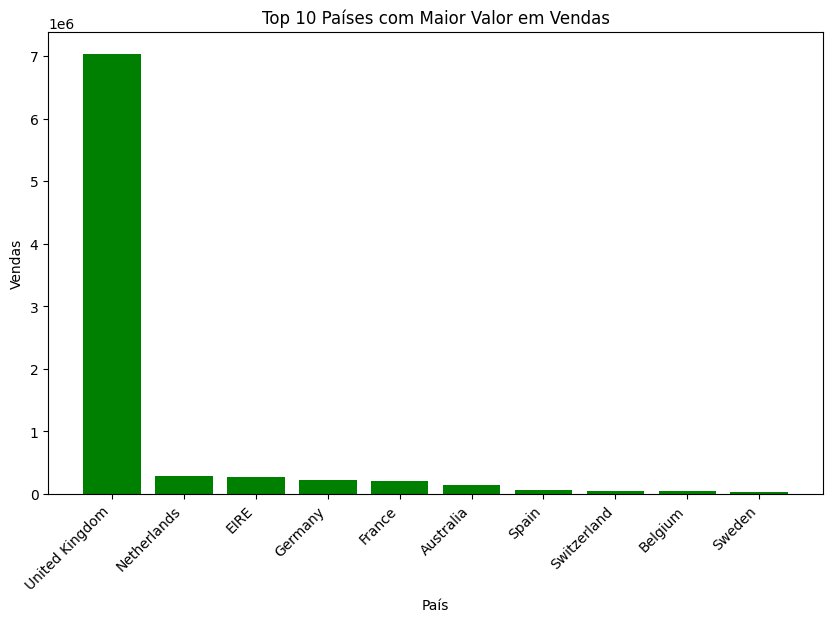

In [ ]:
#Plotagem

plt.figure(figsize=(10, 6))
plt.bar(top_10_countries.index, top_10_countries.values, color='Green')
plt.xlabel('País')
plt.ylabel('Vendas')
plt.title('Top 10 Países com Maior Valor em Vendas')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
#TOP 10 produtos mais vendidos

agg_product_qnt = df_final.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

agg_product_qnt.head(10)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
PACK OF 12 LONDON TISSUES             25329
PACK OF 60 PINK PAISLEY CAKE CASES    24230
Name: Quantity, dtype: int64

In [ ]:
top_10_product = agg_product_qnt.nlargest(10).sort_values(ascending=False)

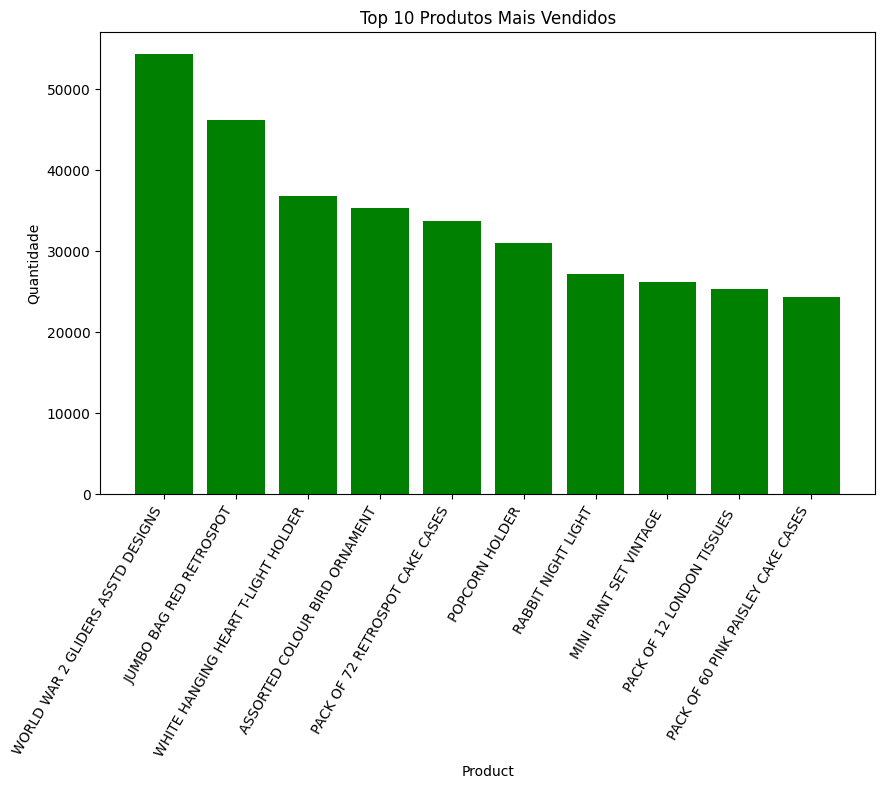

In [ ]:
#Plotagem

plt.figure(figsize=(10, 6))
plt.bar(top_10_product.index, top_10_product, color='Green')
plt.xlabel('Product')
plt.ylabel('Quantidade')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xticks(rotation=60, ha='right')
plt.show()

In [ ]:
#Valor de venda total por mês

df_final.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
df_final.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
Total_price           float64
dtype: object

In [ ]:
df_final['Month'] = df_final['InvoiceDate'].dt.month

df_final

<ipython-input-42-021567c31920>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Month'] = df_final['InvoiceDate'].dt.month


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12


In [ ]:
agg_sales_month = df_final.groupby('Month')['Total_price'].sum().sort_values(ascending=False)

agg_sales_month

Month
11    1156205.610
10    1035642.450
9      950690.202
12     919143.570
5      669212.400
6      660046.050
8      644051.040
7      598962.901
3      594081.760
1      490917.710
4      468374.331
2      446084.920
Name: Total_price, dtype: float64

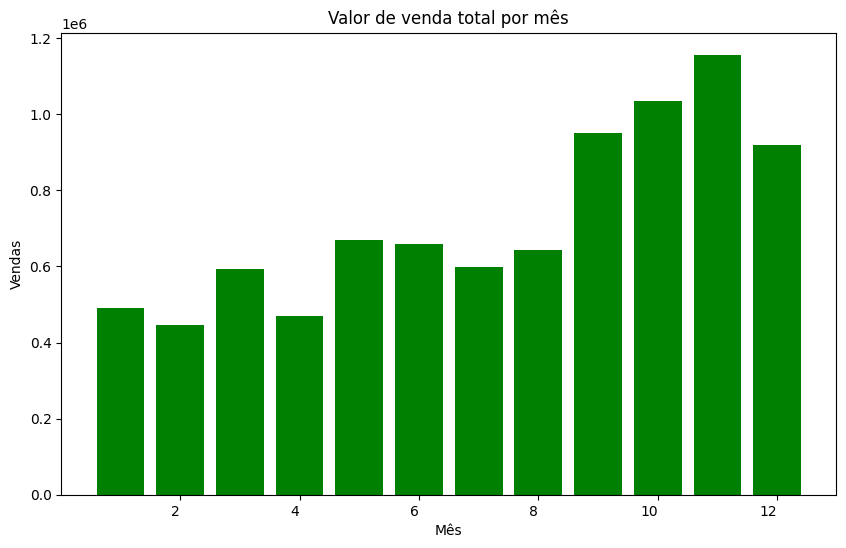

In [ ]:
#Plotagem

plt.figure(figsize=(10, 6))
plt.bar(agg_sales_month.index, agg_sales_month, color='Green')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.title('Valor de venda total por mês')
plt.xticks(rotation=0, ha='right')
plt.show()

In [ ]:
#Valor total de venda por mês e por país

df_final.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,1970-01-01 00:00:00.000000012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1970-01-01 00:00:00.000000012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,1970-01-01 00:00:00.000000012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1970-01-01 00:00:00.000000012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1970-01-01 00:00:00.000000012


In [ ]:
df_final = df_final.astype({"Month":"datetime64[ns]"})

In [ ]:
df_final.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
Total_price           float64
Month          datetime64[ns]
dtype: object

In [ ]:
dados_ordenados = df_final.sort_values(by='Total_price', ascending=False)


In [ ]:
top_10_paises = dados_ordenados['Country'].unique()[:10]

In [ ]:
dados_top_10 = df_final[df_final['Country'].isin(top_10_paises)]

In [ ]:
dados_agrupados = dados_top_10.groupby(['Month', 'Country'])['Total_price'].sum().unstack()

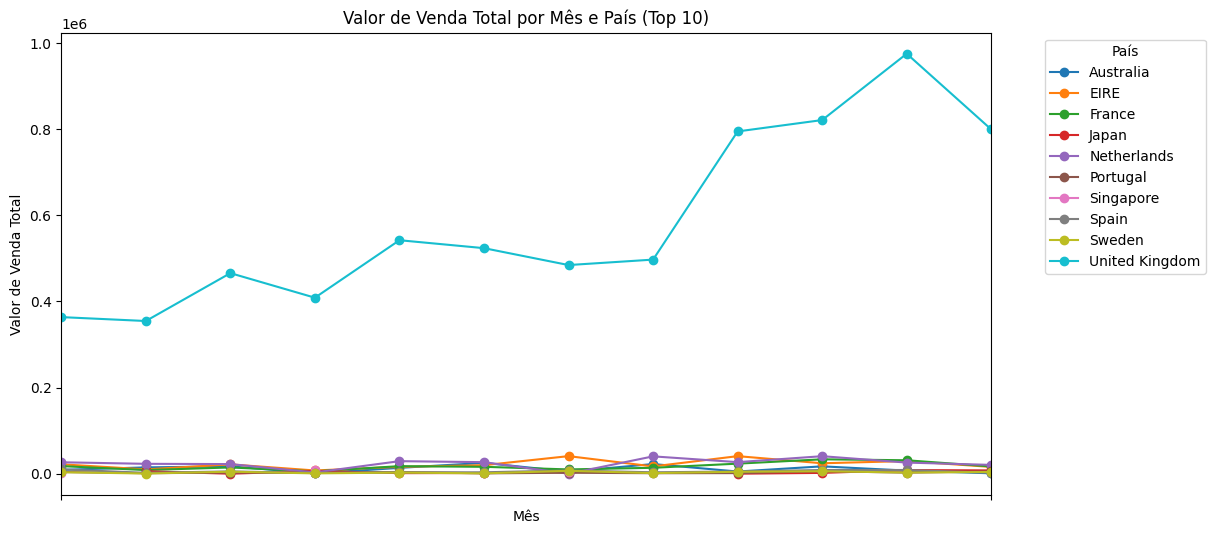

In [ ]:
#Plotando
dados_agrupados.plot(kind='line', marker='o', figsize=(12, 6))

plt.xlabel('Mês')
plt.ylabel('Valor de Venda Total')
plt.title('Valor de Venda Total por Mês e País (Top 10)')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## **ETAPA 10) - CÁLCULO RFM ⚡**

In [ ]:
df_final.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,1970-01-01 00:00:00.000000012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1970-01-01 00:00:00.000000012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,1970-01-01 00:00:00.000000012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1970-01-01 00:00:00.000000012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1970-01-01 00:00:00.000000012


In [ ]:
#Agrupando por cliente e cedido, somando os preços e pegando a primeira data
agg_client_ID= df_final.groupby(['CustomerID', 'InvoiceNo']).agg({'InvoiceDate':'first', 'Total_price': 'sum'}).reset_index()

agg_client_ID

,CustomerID,InvoiceNo,InvoiceDate,Total_price
0,12347,537626,2010-12-07 14:57:00,711.79
1,12347,542237,2011-01-26 14:30:00,475.39
2,12347,549222,2011-04-07 10:43:00,636.25
3,12347,556201,2011-06-09 13:01:00,382.52
4,12347,562032,2011-08-02 08:48:00,584.91
...,...,...,...,...
18524,18283,579673,2011-11-30 12:59:00,220.31
18525,18283,580872,2011-12-06 12:02:00,208.00
18526,18287,554065,2011-05-22 10:39:00,765.28
18527,18287,570715,2011-10-12 10:23:00,1001.32


In [ ]:
ultima_compra_global = agg_client_ID['InvoiceDate'].max()

ultima_compra_global

Timestamp('2011-12-09 12:50:00')

In [ ]:
#Calculando a recência

data_atual = pd.to_datetime('2011-12-09')
agg_client_ID['Recency'] = (data_atual - agg_client_ID['InvoiceDate']).dt.days

In [ ]:
#Calculando a frequência

frequency_df = agg_client_ID.groupby('CustomerID').size().reset_index(name='Frequency')

In [ ]:
#Calculando o ticket médio

tm_df = agg_client_ID.groupby('CustomerID')['Total_price'].sum().reset_index(name='Monetary')

In [ ]:
#Gerando o cálculo RFM com os dados agrupados e calculados

rfm_value = agg_client_ID.groupby('CustomerID').agg({'Recency': 'min', 'InvoiceDate': 'count', 'Total_price': 'sum'}).reset_index()
rfm_value.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']


rfm_value

,CustomerID,Recency,Frequency,Monetary
0,12347,1,7,4310.00
1,12348,74,4,1797.24
2,12349,17,1,1757.55
3,12350,309,1,334.40
4,12352,35,8,2506.04
...,...,...,...,...
4332,18280,276,1,180.60
4333,18281,179,1,80.82
4334,18282,6,2,178.05
4335,18283,2,16,2045.53
